# Import Library

In [38]:
import requests
import json
import datetime
import time
import pandas as pd
from bs4 import BeautifulSoup, SoupStrainer
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load Data

In [75]:
# URL Studentsite UG
url_ss = ('https://www.tempo.co/')
laman_ss = requests.get(url_ss)
#print(f'Status GET laman SS UG: {laman_ss.status_code}')
#print(laman_ss.content)
soup = BeautifulSoup(laman_ss.content, 'html.parser')
#print(soup.prettify())
kontainer_berita = soup.find_all('div', class_='blockbox overflow margin-bottom-no')
#print(kontainer_berita)
judul_list = []
time_list = []
for berita in kontainer_berita:
    start_date = pd.to_datetime('2019-01-01')
    end_date = pd.to_datetime(pd.Timestamp.now())
    for x in range(int(start_date.day), int ((end_date - start_date).days), 1):
        time_date = ' '.join(str(x).strip().split())
        time_list.append(time_date)
        for judul in berita.find_all('h2'):
            judul_string = judul.get_text()
            # buang spasi yang tidak diperlukan
            judul_rapi = ' '.join(str(judul_string).strip().split())
            judul_list.append(judul_rapi)
judul=''.join(judul_list) #Merubah List Menjadi Str

# Data Prepocessing

In [77]:
# Removing StopWord
nltk.download('punkt') # Download data untuk tokenisasi
nltk.download('stopwords') # Download data untuk stopword

def remove_stopwords(text):
    stop_words = set(stopwords.words('indonesian'))
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [token for token in tokens 
                       if token.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# Contoh penggunaan:
text = judul
text_without_stopwords = remove_stopwords(text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acep.Hidayat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acep.Hidayat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Define a Function

In [79]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

# Generate Wordcloud

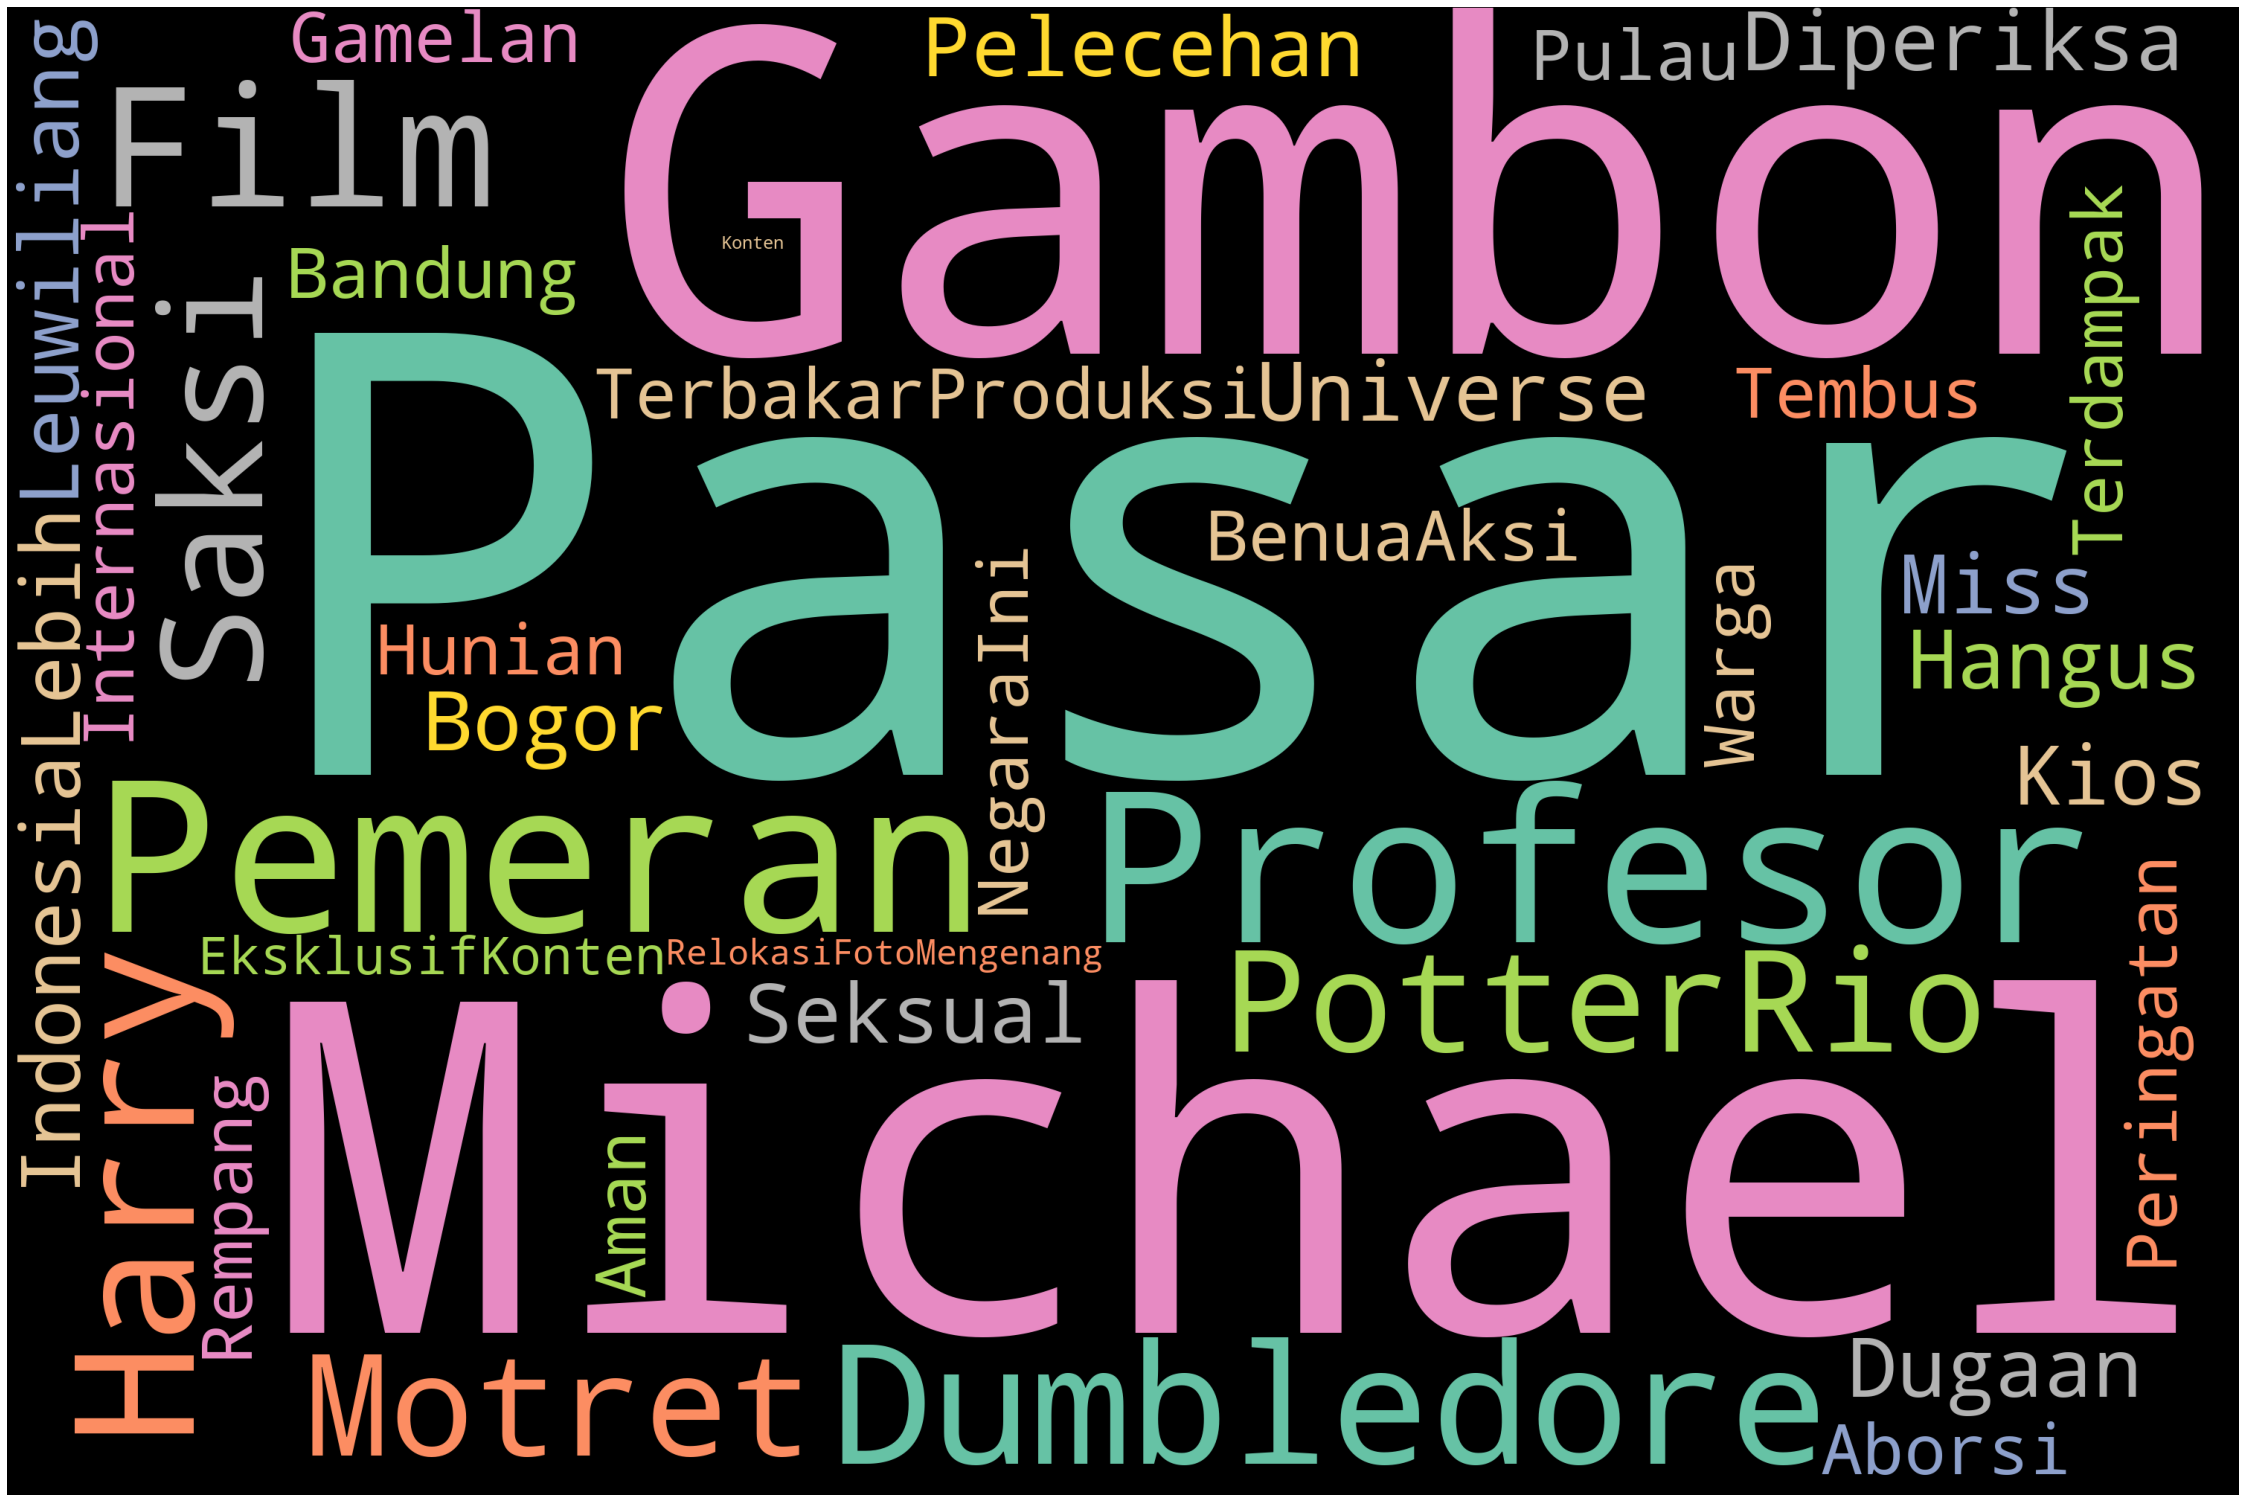

In [80]:
# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='black', colormap='Set2', collocations=False
                     ).generate(text_without_stopwords)
# Plot
plot_cloud(wordcloud)